In [1]:
pip install xgbfir

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import necessary libraries
import pandas as pd 
import numpy as  np 
# loading the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict
# Importing machine learning libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost

# feature extracton feature selection
from sklearn.feature_selection import SelectFromModel
# Libraries fro validation matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import learning_curve


In [4]:
# load the data set 1
df1 = pd.read_excel('Medibuddy insurance data personal details (1) (2).xlsx')

In [5]:
df1

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [6]:
df1['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
b = {'southeast':1,'southwest':2,'northwest':3,'northeast':4}

In [8]:
df1['region'] = df1['region'].map(b)

In [9]:
df1

,Policy no.,children,smoker,region
0,PLC157006,0,no,2
1,PLC157033,1,no,2
2,PLC157060,0,no,2
3,PLC157087,1,no,2
4,PLC157186,5,no,2
...,...,...,...,...
1333,PLC168400,1,yes,4
1334,PLC168436,0,yes,4
1335,PLC168634,2,yes,4
1336,PLC168652,0,yes,4


In [10]:
df2 = pd.read_csv('Medibuddy Insurance Data Price (1) (1).csv')

In [11]:
df2

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830
1334,PLC168904,18,female,31.920,2205.98080
1335,PLC168913,18,female,36.850,1629.83350
1336,PLC168922,21,female,25.800,2007.94500


In [12]:
data = pd.merge(df1, df2, on = "Policy no.", how = "right")

In [13]:
data

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC156898,0,yes,2,19,female,27.900,16884.92400
1,PLC156907,1,no,1,18,male,33.770,1725.55230
2,PLC156916,3,no,1,28,male,33.000,4449.46200
3,PLC156925,0,no,3,33,male,22.705,21984.47061
4,PLC156934,0,no,3,32,male,28.880,3866.85520
...,...,...,...,...,...,...,...,...
1333,PLC168895,3,no,3,50,male,30.970,10600.54830
1334,PLC168904,0,no,4,18,female,31.920,2205.98080
1335,PLC168913,0,no,1,18,female,36.850,1629.83350
1336,PLC168922,0,no,2,21,female,25.800,2007.94500


In [14]:
## creating the back up of oroginal data
data_copy1  = data
data_copy2 = data

In [15]:
data.drop('Policy no.',axis=1,inplace=True)

In [16]:
data

,children,smoker,region,age,sex,bmi,charges in INR
0,0,yes,2,19,female,27.900,16884.92400
1,1,no,1,18,male,33.770,1725.55230
2,3,no,1,28,male,33.000,4449.46200
3,0,no,3,33,male,22.705,21984.47061
4,0,no,3,32,male,28.880,3866.85520
...,...,...,...,...,...,...,...
1333,3,no,3,50,male,30.970,10600.54830
1334,0,no,4,18,female,31.920,2205.98080
1335,0,no,1,18,female,36.850,1629.83350
1336,0,no,2,21,female,25.800,2007.94500


In [17]:
a = {'male':1,'female':2}

In [18]:
data['sex'] = data['sex'].map(a)

In [19]:
c = {'yes':1,'no':2}

In [20]:
data['smoker'] = data['smoker'].map(c)

In [21]:
data

,children,smoker,region,age,sex,bmi,charges in INR
0,0,1,2,19,2,27.900,16884.92400
1,1,2,1,18,1,33.770,1725.55230
2,3,2,1,28,1,33.000,4449.46200
3,0,2,3,33,1,22.705,21984.47061
4,0,2,3,32,1,28.880,3866.85520
...,...,...,...,...,...,...,...
1333,3,2,3,50,1,30.970,10600.54830
1334,0,2,4,18,2,31.920,2205.98080
1335,0,2,1,18,2,36.850,1629.83350
1336,0,2,2,21,2,25.800,2007.94500


In [22]:
data.describe()

,children,smoker,region,age,sex,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,1.795217,2.455157,39.207025,1.494768,30.663397,13270.422265
std,1.205493,0.403694,1.130197,14.049960,0.500160,6.098187,12110.011237
min,0.000000,1.000000,1.000000,18.000000,1.000000,15.960000,1121.873900
25%,0.000000,2.000000,1.000000,27.000000,1.000000,26.296250,4740.287150
50%,1.000000,2.000000,2.000000,39.000000,1.000000,30.400000,9382.033000
75%,2.000000,2.000000,3.000000,51.000000,2.000000,34.693750,16639.912515
max,5.000000,2.000000,4.000000,64.000000,2.000000,53.130000,63770.428010


In [23]:
#custom summary
def custom_summry(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in data[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [24]:
custom_summry(data)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,children,1338,0.0000,0.00000,1.094918,1.000,2.000000,2.000000,5.00000,1.453213e+00,1.205493,0.938380,0.202454,Moderately Skewed (+ve),No outlier
1,smoker,1338,1.0000,2.00000,1.795217,2.000,2.000000,0.000000,2.00000,1.629689e-01,0.403694,-1.464766,0.145756,highly Negatively Skewed,Has outlier
2,region,1338,1.0000,1.00000,2.455157,2.000,3.000000,2.000000,4.00000,1.277344e+00,1.130197,0.049225,-1.385874,Fairly Symmetric(+ve),No outlier
3,age,1338,18.0000,27.00000,39.207025,39.000,51.000000,24.000000,64.00000,1.974014e+02,14.049960,0.055673,-1.245088,Fairly Symmetric(+ve),No outlier
4,sex,1338,1.0000,1.00000,1.494768,1.000,2.000000,1.000000,2.00000,2.501596e-01,0.500160,0.020951,-2.002557,Fairly Symmetric(+ve),No outlier
5,bmi,1338,15.9600,26.29625,30.663397,30.400,34.693750,8.397500,53.13000,3.718788e+01,6.098187,0.284047,-0.050732,Fairly Symmetric(+ve),Has outlier
6,charges in INR,1338,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,11899.625365,63770.42801,1.466524e+08,12110.011237,1.515880,1.606299,Higly (+ve) Skewed,Has outlier


In [25]:
data_new = data

In [27]:
def replace_outlier(data,col,method='quartile',strategy='median'):
    
    col_data = data[col]
    
    if col != 'object':
        
    # Using method 1: Quartile
        if method == 'quartile':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            IQR = q3 - q1
            upper_limit = q3 + 1.5 * IQR
            lower_limit = q1 - 1.5 * IQR

        # Using method 2: Standard Deviation
        elif method == 'standard deviation':
            col_mean = data[col].mean()
            col_sdv = data[col].std()
            limit = 2*col_sdv 
            up_lim = col_mean + limit
            low_lim = col_mean -limit


        else :
            print('Pass a correct method')

        #Displaying the outliers
        outliers = data.loc[(col_data<lower_limit) | (col_data>upper_limit), col]
        outlier_percentage = round(len(outliers)/len(data),2)

        if len(outliers) == 0:
            print(f'The{col} has no outlier')
        else:
            print(f'The {col} has {len(outliers)}outliers')
            print('Outlier percentage:',outlier_percentage)
            print(f'The{col} has outlier values:',np.sort(np.array(outliers)))
            display(data.loc[(col_data<lower_limit) | (col_data>upper_limit), col])

        # Replacing Outliers

        # Using startegy 1 that is 'median'

        if strategy == 'median':
            data.loc[(col_data<lower_limit) | (col_data>upper_limit), col] = data[col].median()

            # Using straegy 2 that is 'mean'

        elif strategy == 'mean':
            data.loc[(col_data<low_lim) | (col_data>up_lim),col] = data[col].mean()

        else:
            print('Pass a correct strategy')
    else:
        pass
            
    return data
            

In [36]:
data_new = replace_outlier(data_new,'charges in INR')

Thecharges in INR has no outlier


In [39]:
data_new = replace_outlier(data_new,'bmi')

Thebmi has no outlier


In [40]:
custom_summry(data_new)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,children,1338,0.0000,0.00000,1.094918,1.000000,2.000,2.00000,5.000,1.453213e+00,1.205493,0.938380,0.202454,Moderately Skewed (+ve),No outlier
1,smoker,1338,1.0000,2.00000,1.795217,2.000000,2.000,0.00000,2.000,1.629689e-01,0.403694,-1.464766,0.145756,highly Negatively Skewed,Has outlier
2,region,1338,1.0000,1.00000,2.455157,2.000000,3.000,2.00000,4.000,1.277344e+00,1.130197,0.049225,-1.385874,Fairly Symmetric(+ve),No outlier
3,age,1338,18.0000,27.00000,39.207025,39.000000,51.000,24.00000,64.000,1.974014e+02,14.049960,0.055673,-1.245088,Fairly Symmetric(+ve),No outlier
4,sex,1338,1.0000,1.00000,1.494768,1.000000,2.000,1.00000,2.000,2.501596e-01,0.500160,0.020951,-2.002557,Fairly Symmetric(+ve),No outlier
5,bmi,1338,15.9600,26.29625,30.512022,30.400000,34.430,8.13375,46.530,3.441739e+01,5.866633,0.141912,-0.371284,Fairly Symmetric(+ve),No outlier
6,charges in INR,1338,1121.8739,4740.28715,7803.660956,9377.920826,9382.033,4641.74585,16297.846,1.278406e+07,3575.479740,-0.142836,-0.773323,Fairly Symmetric(-ve),No outlier


In [30]:
# Building Odt plots 
# Odt consists of 3 plots Box plot(descriptive stats),Distribution without outliers,Distribution wit outliers

In [41]:
df = data_new

In [42]:
df

,children,smoker,region,age,sex,bmi,charges in INR
0,0,1,2,19,2,27.900,9377.969205
1,1,2,1,18,1,33.770,1725.552300
2,3,2,1,28,1,33.000,4449.462000
3,0,2,3,33,1,22.705,9378.936775
4,0,2,3,32,1,28.880,3866.855200
...,...,...,...,...,...,...,...
1333,3,2,3,50,1,30.970,10600.548300
1334,0,2,4,18,2,31.920,2205.980800
1335,0,2,1,18,2,36.850,1629.833500
1336,0,2,2,21,2,25.800,2007.945000


In [43]:
df['logarithm_function'] = np.log(df['charges in INR']) 

In [44]:
logy = pd.DataFrame(data[{'logarithm_function'}])

In [45]:
logy

,logarithm_function
0,9.146119
1,7.453302
2,8.400538
3,9.146222
4,8.260197
...,...
1333,9.268661
1334,7.698927
1335,7.396233
1336,7.604867


In [46]:
df.drop('charges in INR',axis=1,inplace=True)

In [47]:
custom_summry(df)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,children,1338,0.000000,0.000000,1.094918,1.000000,2.000000,2.000000,5.000000,1.453213,1.205493,0.938380,0.202454,Moderately Skewed (+ve),No outlier
1,smoker,1338,1.000000,2.000000,1.795217,2.000000,2.000000,0.000000,2.000000,0.162969,0.403694,-1.464766,0.145756,highly Negatively Skewed,Has outlier
2,region,1338,1.000000,1.000000,2.455157,2.000000,3.000000,2.000000,4.000000,1.277344,1.130197,0.049225,-1.385874,Fairly Symmetric(+ve),No outlier
3,age,1338,18.000000,27.000000,39.207025,39.000000,51.000000,24.000000,64.000000,197.401387,14.049960,0.055673,-1.245088,Fairly Symmetric(+ve),No outlier
4,sex,1338,1.000000,1.000000,1.494768,1.000000,2.000000,1.000000,2.000000,0.250160,0.500160,0.020951,-2.002557,Fairly Symmetric(+ve),No outlier
5,bmi,1338,15.960000,26.296250,30.512022,30.400000,34.430000,8.133750,46.530000,34.417386,5.866633,0.141912,-0.371284,Fairly Symmetric(+ve),No outlier
6,logarithm_function,1338,7.022756,8.463853,8.810972,9.146113,9.146552,0.682699,9.698788,0.378608,0.615312,-1.057351,0.159516,highly Negatively Skewed,Has outlier


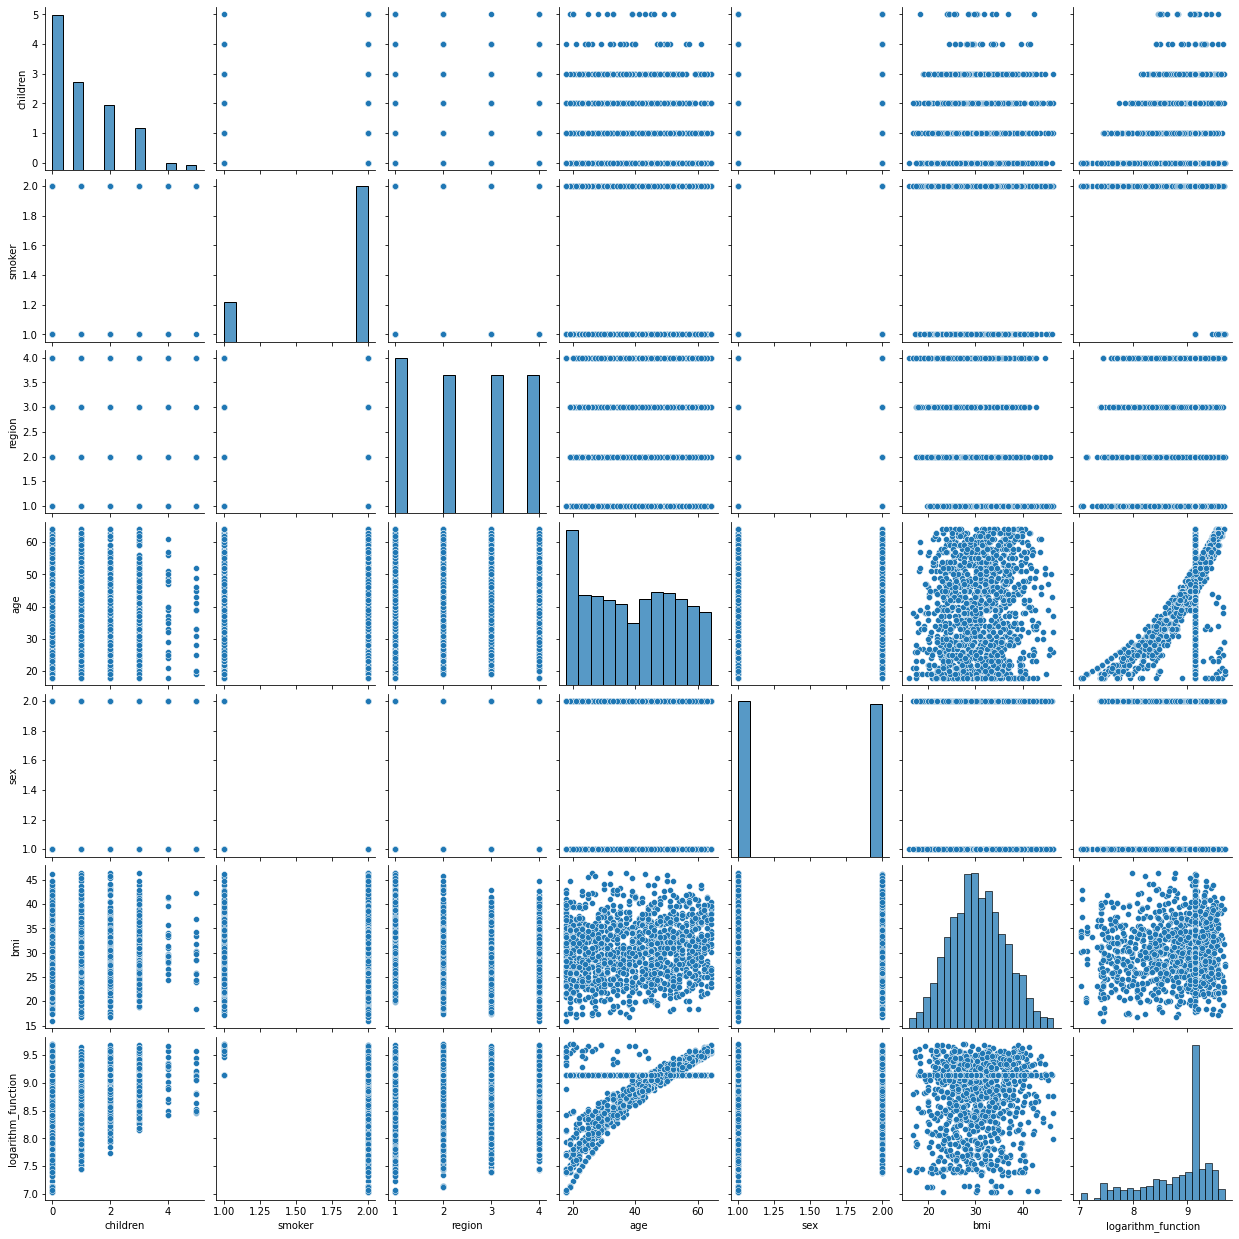

In [48]:
sns.pairplot(df)

KeyError: 'charges in INR'

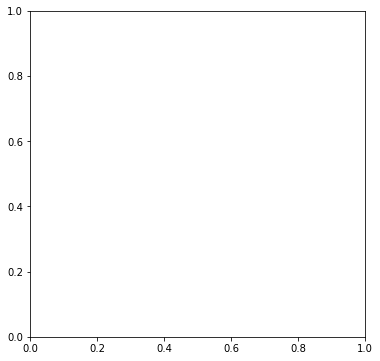

In [50]:
for col in df.columns:
    if col != 'logarithm_function':
        f,ax1 = plt.subplots(figsize = (6,6))
        sns.regplot(x = df[col],y = df['charges in INR'],ax = ax1).set_title(f'Relationship between {col} and charges in INR')

<AxesSubplot:>

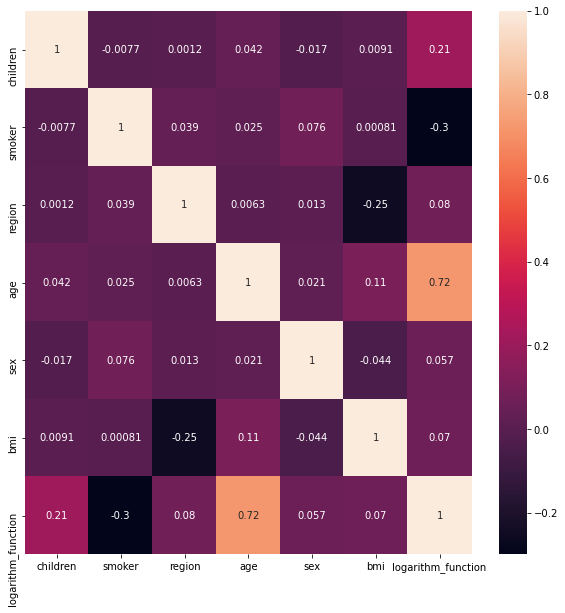

In [51]:
# Plotting the heat map
f,ax= plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [52]:
# Correlation of each variable of the target
def corr_with_target(df,tcol):
    ind_var = df.drop([tcol],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(df[tcol].corr(df[col]))
    result = pd.DataFrame([ind_var,corr_result],index=['variables','correlation']).T.sort_values('correlation',ascending = False)
    return(result)

In [53]:
corr_with_target(df,'logarithm_function')

,variables,correlation
3,age,0.722405
0,children,0.210166
2,region,0.0804456
5,bmi,0.0701331
4,sex,0.0568995
1,smoker,-0.299393


In [54]:
# Variace inflaation factor 
#its one of the important method to  find multicollinearity
# formula for VIF = 1/(1-R^2)
# IF the VIF is more than 5 we say that the data is highly multicollinearity


# steps involved in VIF:
# 1.Regress every indepedet variables with all other  indepedent variables
# 2. Observe the Rsquare
# cal the VIF formula


In [55]:
def VIF_collinearity(ind_vari):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['VIf factor'] = [variance_inflation_factor(ind_vari.values,i)for i in range(ind_vari.shape[1])]
    result['features'] = ind_vari.columns
    return(result.sort_values('VIf factor',ascending = False))

In [56]:
VIF_collinearity(df.drop('logarithm_function',axis = 1))

,VIf factor,features
5,16.571292,bmi
1,16.241947,smoker
4,8.888097,sex
3,8.495496,age
2,5.174487,region
0,1.811401,children


In [57]:
# Processing for model building
# Normal model building with test train split
# cross val score
# Hyperparameter tuning

In [58]:
def train_and_test_split(df,tcol,test_size=0.3):
    
    x = df.drop(tcol,axis=1)
    y = df[tcol]
    
    return(train_test_split(x,y,test_size=test_size,random_state=50))

In [59]:
def build_model(mname,m,df,tcol):
    
    x_train,x_test,y_train,y_test = train_and_test_split(df,tcol)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))
    r2score = r2_score(y_test,y_pred)
    
    result = [mname,rmse,r2score]
    
    
    return(result)

In [60]:
lr = LinearRegression()

In [61]:
build_model('Linear Regression',lr,df,'logarithm_function')

['Linear Regression', 2856.355861384296, 0.7027912967133718]

In [62]:
# Building Multiple models 

def mul_models(data,tcol):
    col = ['Model Name','RMSE','RSquare']
    result = pd.DataFrame(columns=col)
    result.loc[len(result)] = build_model('Linear Regression',LinearRegression(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Lasso',Lasso(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Ridge',Ridge(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Decision Tree Regression',DecisionTreeRegressor(),df,'logarithm_function')
    result.loc[len(result)] = build_model('KNeighborsRegressor',KNeighborsRegressor(),df,'logarithm_function')
    result.loc[len(result)] = build_model('SVM',SVR(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Ada Boost',AdaBoostRegressor(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Gradient Boosting',GradientBoostingRegressor(),df,'logarithm_function')
    result.loc[len(result)] = build_model('XGBoost',XGBRegressor(),df,'logarithm_function')
    result.loc[len(result)] = build_model('Random Forest',RandomForestRegressor(),df,'logarithm_function')
    
    return(result)
    

In [63]:
mul_models(df.drop('logarithm_function',axis=1),df['logarithm_function'])

,Model Name,RMSE,RSquare
0,Linear Regression,2856.355861,0.702791
1,Lasso,2420.084570,0.535123
2,Ridge,2847.469906,0.702862
3,Decision Tree Regression,2052.863717,0.739734
4,KNeighborsRegressor,2297.568724,0.657741
5,SVM,2427.816876,0.633669
6,Ada Boost,1745.745649,0.740912
7,Gradient Boosting,1471.041320,0.887073
8,XGBoost,1787.166775,0.838248
9,Random Forest,1435.492275,0.874834


In [64]:
# Building model with cross validation

def Kfold_cv(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_kn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_abr = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgbr = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    models_names = ['LinearRegression()','Lasso()','Ridge()','DecisionTreeRegressor()','KNeighborsRegressor()','SVR()','AdaBoostRegressor()','GradientBoostingRegressor()','XGBRegressor()','RandomForestRegressor()']
    score = [score_lr,score_la,score_ri,score_dt,score_kn,score_svr,score_abr,score_gbr,score_xgbr,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = models_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))





In [65]:
Kfold_cv(df.drop('logarithm_function',axis=1),df['logarithm_function'])

,Model Names,Score Mean,Score Std
7,GradientBoostingRegressor(),0.839435,0.094896
9,RandomForestRegressor(),0.829285,0.078547
8,XGBRegressor(),0.783359,0.082713
6,AdaBoostRegressor(),0.744752,0.065985
3,DecisionTreeRegressor(),0.709674,0.115676
2,Ridge(),0.655082,0.091132
0,LinearRegression(),0.655080,0.091150
4,KNeighborsRegressor(),0.546679,0.137123
5,SVR(),0.541131,0.181449
1,Lasso(),0.498077,0.085671


In [68]:
# Hyperparameter tuning

In [69]:
def tuning_model(x,y,fold=10):
    
    
    #listing the parameters
    param_las = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,600,750,850,950,1000]}
    param_ri =  {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,600,750,850,950,1000]}
    param_svm = {'kernel':['linear','rbf','sigmoid','poly'],'gamma':['scale','auto']}
    param_rf = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400,500,600,700,800,900,1000]}
    param_kn = {'n_neighbors':[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400]}
    param_xg = {'alpha':[0,1,2,3,4,5],'gamma':[10,20,30,40,50,60,70,80,90,100,125,150],'reg_lamda':[0,1]}
    
    
    #Hyperparameter tuning using grid search cv
    
    tune_las = GridSearchCV(Lasso(),param_las,cv=fold)
    tune_ri = GridSearchCV(Ridge(),param_ri,cv=fold)
    tune_svm = GridSearchCV(SVR(),param_svm,cv=fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
    tune_kn = GridSearchCV(KNeighborsRegressor(),param_kn,cv=fold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=fold)
    
    
    # Fitting the data
    
    tune_las.fit(x,y)
    tune_ri.fit(x,y)
    tune_svm.fit(x,y)
    tune_rf.fit(x,y)
    tune_kn.fit(x,y)
    tune_xg.fit(x,y)
    
    
    tuned = [tune_las,tune_ri,tune_svm,tune_rf,tune_kn,tune_xg]
    names = ['Lasso','Ridge','SVM','Random Forest','Knn','XGboost']
    
    for i in range(0,len(tuned)):
        print('Model',names[i])
        print('Best value',tuned[i].best_params_)

In [70]:
#tuning_model(df.drop('logarithm_function',axis=1),df['logarithm_function'])

In [71]:
def Kfold_cv_hyperparametertuning(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(alpha=0.0001),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(alpha=4),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_kn = cross_val_score(KNeighborsRegressor(n_neighbors=20),x,y,cv=fold)
    score_svr = cross_val_score(SVR(gamma='auto',kernel='rbf'),x,y,cv=fold)
    score_abr = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgbr = cross_val_score(XGBRegressor(alpha=0,gamma=10,reg_lamda=0),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators=1000),x,y,cv=fold)
    
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    models_names = ['LinearRegression()','Lasso()','Ridge()','DecisionTreeRegressor()','KNeighborsRegressor()','SVR()','AdaBoostRegressor()','GradientBoostingRegressor()','XGBRegressor()','RandomForestRegressor()']
    score = [score_lr,score_la,score_ri,score_dt,score_kn,score_svr,score_abr,score_gbr,score_xgbr,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = models_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))
        

In [72]:
Kfold_cv_hyperparametertuning(df.drop('logarithm_function',axis=1),df['logarithm_function'])

[16:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

,Model Names,Score Mean,Score Std
7,GradientBoostingRegressor(),0.839122,0.094410
9,RandomForestRegressor(),0.827522,0.079253
6,AdaBoostRegressor(),0.753531,0.055230
8,XGBRegressor(),0.749804,0.057366
5,SVR(),0.722594,0.080578
3,DecisionTreeRegressor(),0.710834,0.121779
1,Lasso(),0.655084,0.091121
0,LinearRegression(),0.655080,0.091150
2,Ridge(),0.655053,0.091086
4,KNeighborsRegressor(),0.551955,0.123606


In [73]:
#clustering
from sklearn.cluster import KMeans

In [74]:
x = df.drop('logarithm_function',axis=1)

In [75]:
y = df['logarithm_function']

In [76]:
labels = KMeans(n_clusters=2,random_state=100).fit_predict(x)

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='logarithm_function'>

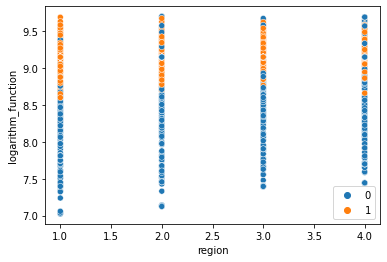

In [77]:
sns.scatterplot(x['region'],y=y,hue=labels)

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='logarithm_function'>

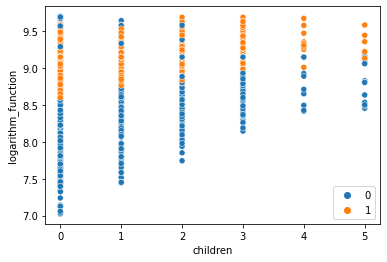

In [78]:
sns.scatterplot(x['children'],y=y,hue=labels)

In [79]:
def clusters_among_variables(x,y,labels):
    
    columns = list(set(list(x.columns)) - set(df['logarithm_function']))
    
    r = int(len(columns)/2)
    
    if r%2 ==0:
        r = r
    else:
        r = r+1
        
        
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    
    
    for col in range(0,r):
        for j in range(0,2):
            if a != len(columns):
                ax[col][j].scatter(x[y],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(y)
                ax[col][j].set_ylabel(columns[a])
                a = a+1 

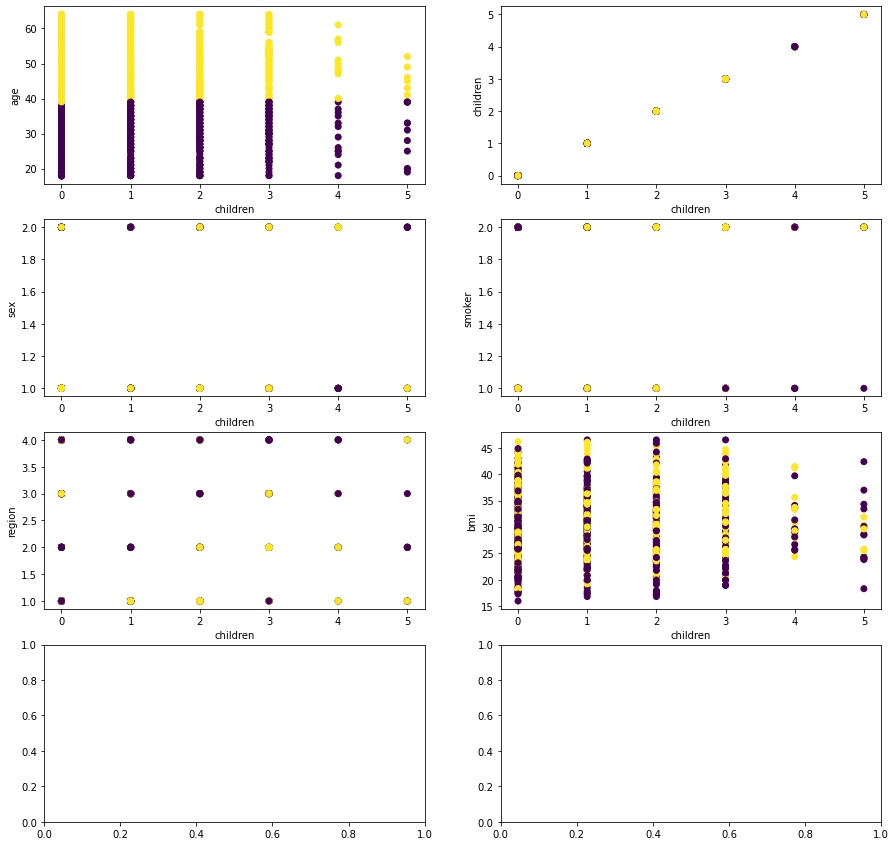

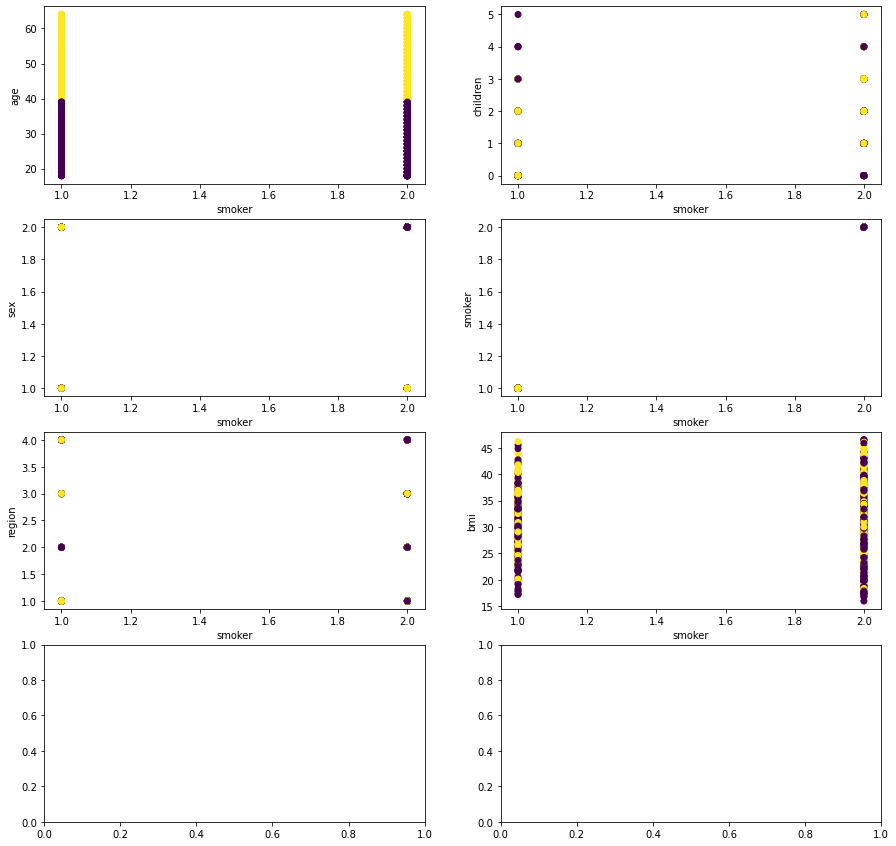

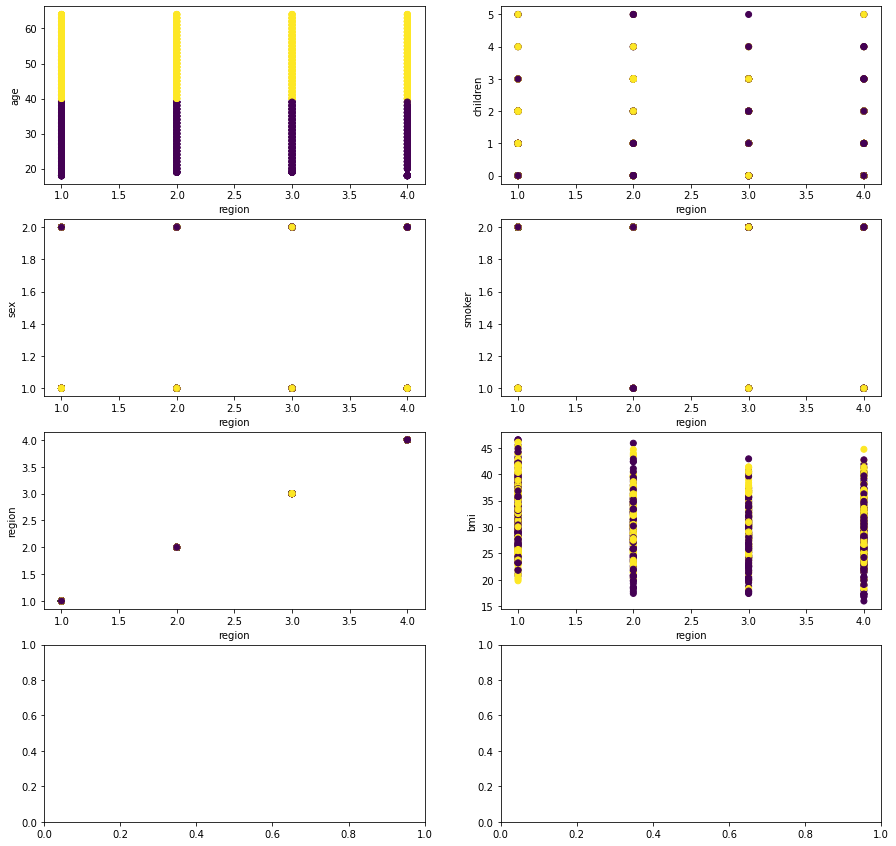

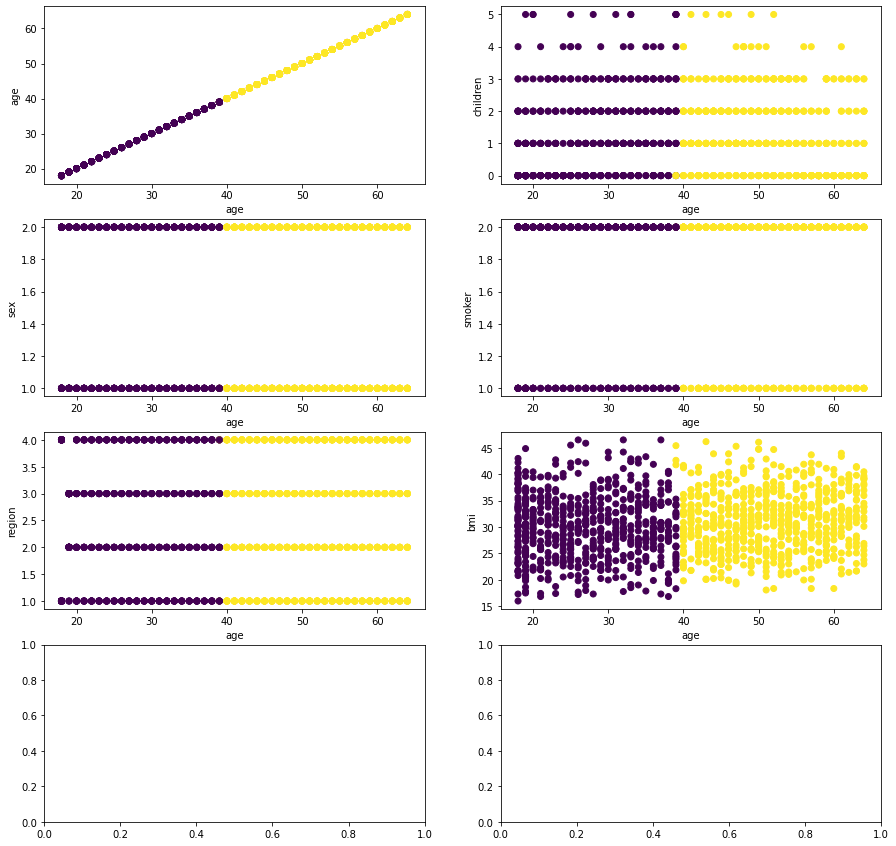

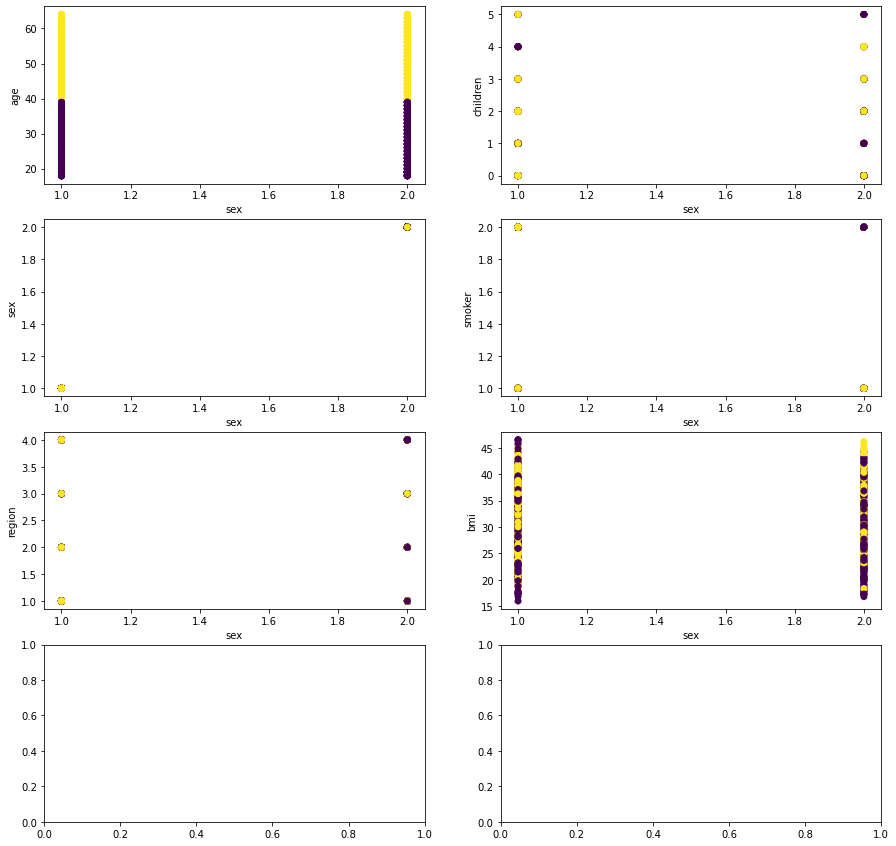

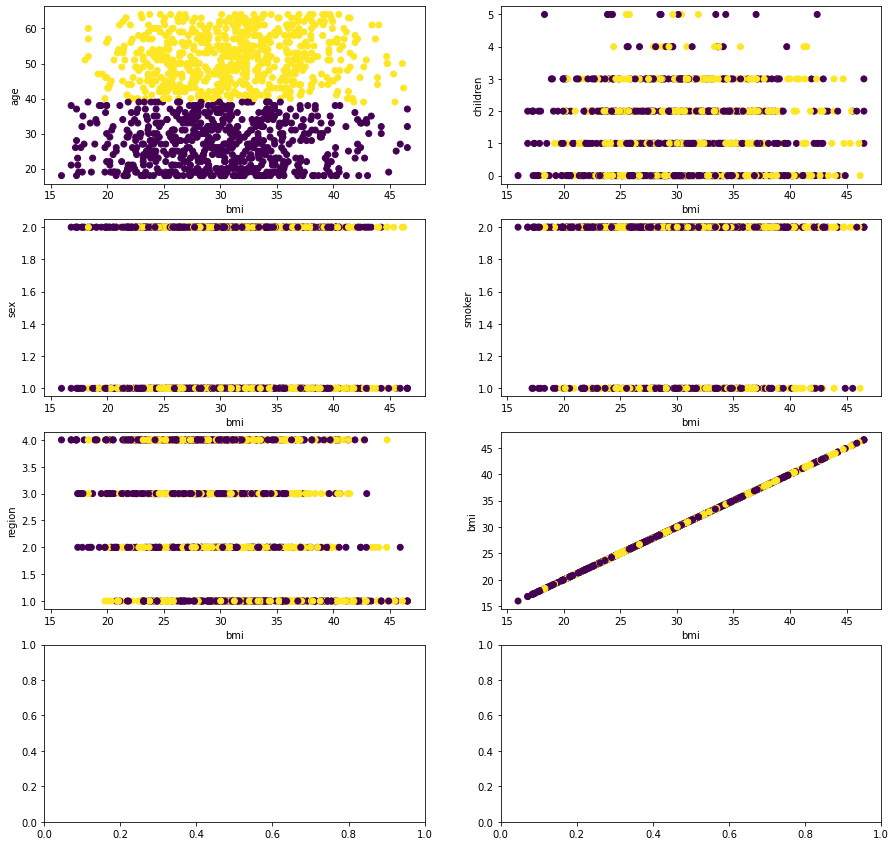

In [80]:
for col in x.columns:
    clusters_among_variables(x,col,labels)

In [81]:
# Observations of clustering
#1) cement is having the clusters with alsmost all variables


In [82]:
clusters_df = df.join(pd.DataFrame(data = labels,columns = ['labels']),how = 'left')

In [83]:
clusters_df

,children,smoker,region,age,sex,bmi,logarithm_function,labels
0,0,1,2,19,2,27.900,9.146119,0
1,1,2,1,18,1,33.770,7.453302,0
2,3,2,1,28,1,33.000,8.400538,0
3,0,2,3,33,1,22.705,9.146222,0
4,0,2,3,32,1,28.880,8.260197,0
...,...,...,...,...,...,...,...,...
1333,3,2,3,50,1,30.970,9.268661,1
1334,0,2,4,18,2,31.920,7.698927,0
1335,0,2,1,18,2,36.850,7.396233,0
1336,0,2,2,21,2,25.800,7.604867,0


In [84]:
centroid = clusters_df.groupby('labels')['bmi'].agg(['mean','median'])

In [85]:
centroid

,mean,median
labels,,
0,29.893495,29.8
1,31.134258,30.9


In [86]:
clusters_df = clusters_df.merge(centroid,on='labels',how='left')

In [87]:
clusters_df.drop('labels',axis=1,inplace=True)

In [88]:
clusters_df

,children,smoker,region,age,sex,bmi,logarithm_function,mean,median
0,0,1,2,19,2,27.900,9.146119,29.893495,29.8
1,1,2,1,18,1,33.770,7.453302,29.893495,29.8
2,3,2,1,28,1,33.000,8.400538,29.893495,29.8
3,0,2,3,33,1,22.705,9.146222,29.893495,29.8
4,0,2,3,32,1,28.880,8.260197,29.893495,29.8
...,...,...,...,...,...,...,...,...,...
1333,3,2,3,50,1,30.970,9.268661,31.134258,30.9
1334,0,2,4,18,2,31.920,7.698927,29.893495,29.8
1335,0,2,1,18,2,36.850,7.396233,29.893495,29.8
1336,0,2,2,21,2,25.800,7.604867,29.893495,29.8


In [89]:
Kfold_cv_hyperparametertuning(clusters_df.drop('logarithm_function',axis=1),clusters_df['logarithm_function'])

[16:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

,Model Names,Score Mean,Score Std
7,GradientBoostingRegressor(),0.838759,0.094433
9,RandomForestRegressor(),0.826815,0.079070
8,XGBRegressor(),0.749804,0.057366
5,SVR(),0.741536,0.085326
6,AdaBoostRegressor(),0.741356,0.048618
3,DecisionTreeRegressor(),0.711697,0.114391
1,Lasso(),0.655115,0.091401
0,LinearRegression(),0.655114,0.091441
2,Ridge(),0.655091,0.091377
4,KNeighborsRegressor(),0.552237,0.123520


In [90]:
# Feature Importance

In [91]:
x_train,x_test,y_train,y_test = train_and_test_split(clusters_df,'logarithm_function',test_size=0.3)

In [92]:
clusters_df

,children,smoker,region,age,sex,bmi,logarithm_function,mean,median
0,0,1,2,19,2,27.900,9.146119,29.893495,29.8
1,1,2,1,18,1,33.770,7.453302,29.893495,29.8
2,3,2,1,28,1,33.000,8.400538,29.893495,29.8
3,0,2,3,33,1,22.705,9.146222,29.893495,29.8
4,0,2,3,32,1,28.880,8.260197,29.893495,29.8
...,...,...,...,...,...,...,...,...,...
1333,3,2,3,50,1,30.970,9.268661,31.134258,30.9
1334,0,2,4,18,2,31.920,7.698927,29.893495,29.8
1335,0,2,1,18,2,36.850,7.396233,29.893495,29.8
1336,0,2,2,21,2,25.800,7.604867,29.893495,29.8


In [93]:
xgb = XGBRegressor()

In [94]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

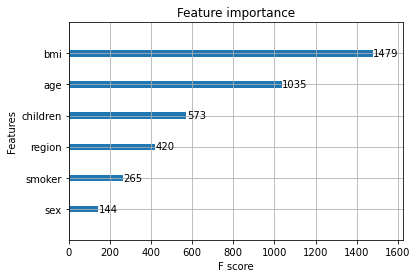

In [95]:
xgboost.plot_importance(xgb)

In [96]:
xgb_pred = xgb.predict(x_test)

In [97]:
xgb_score = r2_score(y_test,xgb_pred)

In [98]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [99]:
xgb_rmse

0.2485993753514741

In [100]:
xgb.feature_importances_

array([0.07879359, 0.31765428, 0.05020317, 0.42327383, 0.06129019,
       0.06878494, 0.        , 0.        ], dtype=float32)

In [101]:
l = []
threshold = np.sort(xgb.feature_importances_)
for t in threshold:
    selection = SelectFromModel(xgb,threshold=t,prefit=True)
    select_x_train = selection.transform(x_train)
    selected_model = XGBRegressor()
    selected_model.fit(select_x_train,y_train)
    select_x_test = selection.transform(x_test)
    xgb_predict = selected_model.predict(select_x_test)
    result = [t,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,xgb_predict)),r2_score(y_test,xgb_predict)]
    l.append(result)
    
result_df = pd.DataFrame(l,columns=['Threshold','No. Of Features','RMSE','R2 Score'])
result_df

,Threshold,No. Of Features,RMSE,R2 Score
0,0.000000,8,0.248599,0.838248
1,0.000000,8,0.248599,0.838248
2,0.050203,6,0.248599,0.838248
3,0.061290,5,0.271377,0.807250
4,0.068785,4,0.276708,0.799601
5,0.078794,3,0.246724,0.840679
6,0.317654,2,0.264911,0.816325
7,0.423274,1,0.409283,0.561574


In [102]:
x1=x_train.drop(['mean','median'],axis=1)

In [103]:
x1

,children,smoker,region,age,sex,bmi
69,3,1,1,28,1,23.980
852,0,1,4,46,2,35.530
771,2,2,2,53,2,26.700
33,0,2,3,63,1,28.310
168,1,2,3,19,2,31.825
...,...,...,...,...,...,...
229,2,2,4,47,1,25.460
70,0,1,1,27,2,24.750
132,2,2,2,53,2,35.900
1313,2,1,2,19,2,34.700


In [104]:
y1 = y_train

In [105]:
Kfold_cv_hyperparametertuning(x1,y1)

[16:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

,Model Names,Score Mean,Score Std
7,GradientBoostingRegressor(),0.812476,0.095956
9,RandomForestRegressor(),0.786613,0.092662
8,XGBRegressor(),0.710307,0.051237
6,AdaBoostRegressor(),0.704571,0.066957
3,DecisionTreeRegressor(),0.644097,0.149282
1,Lasso(),0.638474,0.053929
0,LinearRegression(),0.638470,0.053954
2,Ridge(),0.638430,0.053843
5,SVR(),0.631953,0.077156
4,KNeighborsRegressor(),0.502065,0.081668


In [106]:
def plot_learning_curve(modelname,model):
    train_size,train_score,test_score = learning_curve(estimator=model,X=x1,y=y1,cv=10)
    train_score_mean = np.mean(train_score,axis=1)
    test_score_mean = np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color='blue')
    plt.plot(train_size,test_score_mean,color='red')
    plt.xlabel('sample')
    plt.ylabel('accuracy')
    plt.title('Learning Curve of '+modelname)
    plt.legend(('Training Score','Testing Score'))

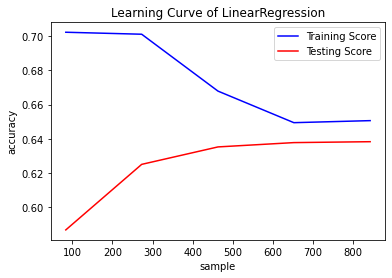

In [107]:
plot_learning_curve('LinearRegression',LinearRegression())

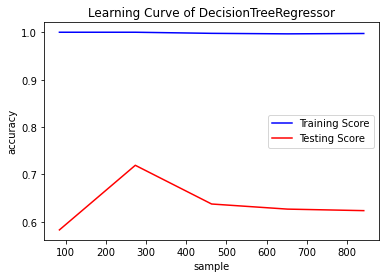

In [108]:
plot_learning_curve('DecisionTreeRegressor',DecisionTreeRegressor())

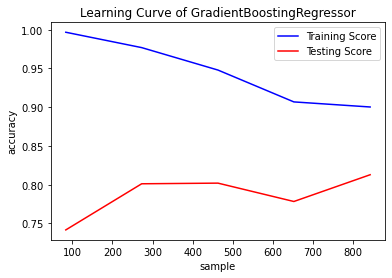

In [109]:
plot_learning_curve('GradientBoostingRegressor',GradientBoostingRegressor())

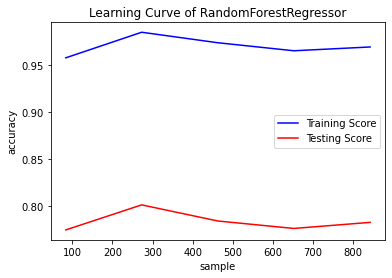

In [110]:
plot_learning_curve('RandomForestRegressor',RandomForestRegressor())

In [ ]:
plot_learning_curve('GradientBoostingRegressor',GradientBoostingRegressor())

In [ ]:
plot_learning_curve('GradientBoostingRegressor',GradientBoostingRegressor())